In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
california = fetch_california_housing()
data = california.data
target = california.target
features = california.feature_names

In [3]:
X = data[:, [0, 3]]
Y = target

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [6]:
class LinearLeastSquaresMulti:
    def __init__(self):
        self.coefficients = None
    
    def fit(self, X, Y):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        self.coefficients = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_b.T, X_b)), X_b.T), Y)
    
    def predict(self, X):
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        return np.matmul(X_b, self.coefficients)

In [7]:
lls_multi = LinearLeastSquaresMulti()
lls_multi.fit(X_train, Y_train)

In [8]:
Y_pred = lls_multi.predict(X_test)

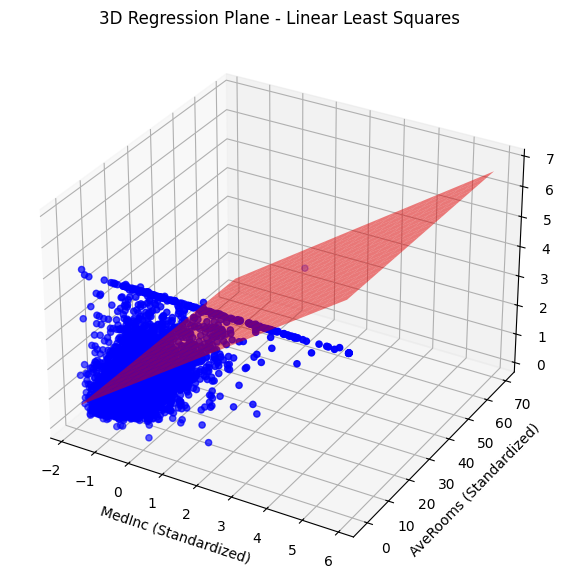

In [9]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], Y_test, color='blue', label='Actual Data')

x_surf, y_surf = np.meshgrid(np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 20), 
                             np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 20))
z_surf = lls_multi.coefficients[0] + lls_multi.coefficients[1] * x_surf + lls_multi.coefficients[2] * y_surf
ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

ax.set_xlabel('MedInc (Standardized)')
ax.set_ylabel('AveRooms (Standardized)')
ax.set_zlabel('Price')
ax.set_title('3D Regression Plane - Linear Least Squares')
plt.show()